# Data Analysis and Pre-Processing

In [73]:
# EDA
import pandas as pd
import numpy as np

# Load Data Viz Pkgs
import seaborn as sns

# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [74]:
# Load Dataset
df = pd.read_csv("emotion_dataset_raw.csv")

In [75]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [69]:
# Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [70]:
# Drop rows with 'shame' or 'disgust' in the 'Emotion' column
df= df[~df['Emotion'].isin(['shame', 'disgust', 'sadness', 'fear'])].copy()

# Check the new class distribution
df['Emotion'].value_counts()


joy         11045
anger        4297
surprise     4062
neutral      2254
Name: Emotion, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

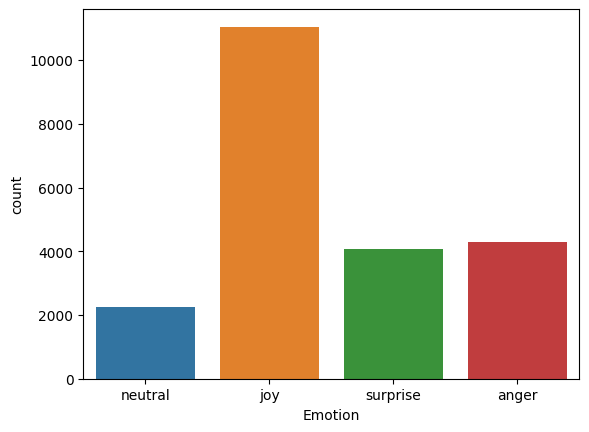

In [71]:
# Plot
sns.countplot(x='Emotion',data=df)

In [76]:
from sklearn.utils import resample
import pandas as pd


# Separate the data into three classes
joy_class = df[df['Emotion'] == 'joy']
surprise_class = df[df['Emotion'] == 'surprise']
neutral_class = df[df['Emotion'] == 'neutral']
anger_class = df[df['Emotion'] == 'anger']


# Downsample the 'joy' class
joy_class_downsampled = resample(joy_class,
                                 replace=False,  # sample without replacement
                                 n_samples=len(surprise_class),  # match the number of samples in 'surprise' class
                                 random_state=42)  # for reproducibility


# Combine the upsampled 'neutral' class, downsampled 'joy' class, and the original 'surprise' class
df = pd.concat([neutral_class, joy_class_downsampled, surprise_class, anger_class])

# Check the new class distribution
df['Emotion'].value_counts()


anger       4297
joy         4062
surprise    4062
neutral     2254
Name: Emotion, dtype: int64

In [77]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [78]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [79]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [80]:
# Numbers
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_numbers)

In [81]:
 # Emojies
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_emojis)

In [82]:
# Specialcharacters
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_special_characters)

In [83]:
# Count empty rows
empty_rows_count = df['Clean_Text'].isnull().sum()
print(f"Number of empty rows: {empty_rows_count}")

Number of empty rows: 0


In [84]:
df = df.drop('Text', axis=1)

Pre- Processed data

In [85]:
df

,Emotion,Clean_Text
0,neutral,
61,neutral,motherinlaw thing disciplining disciplining ...
68,neutral,think started talking found extremely funny...
76,neutral,
114,neutral,
...,...,...
34762,anger,letting Explosions Sky express pentup emotions...
34763,anger,re angry m nt
34775,anger,Iv monthly allowance Internet data apparently ...
34779,anger,Love dont beat highscore doodlejump throw phon...


In [86]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [87]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.2,random_state=42)

# Machine Learning Model (Logistic Regression)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
import nlpaug.augmenter.word as naw

# Apply data augmentation
aug = naw.SynonymAug()
augmented_texts = aug.augment(x_train.tolist())

# Combine original and augmented data
x_train_augmented = x_train.tolist() + augmented_texts
y_train_augmented = y_train.tolist() + y_train.tolist()

# Vectorize text data
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train_augmented)
x_test_vec = vectorizer.transform(x_test)

# Build and train logistic regression model with L2 regularization
lr_model = LogisticRegression(penalty='l2', C=0.4, max_iter=1000)
lr_model.fit(x_train_vec, y_train_augmented)

# Predictions with L2 regularization
y_pred_lr_with_regularization = lr_model.predict(x_test_vec)
accuracy_lr_with_regularization = accuracy_score(y_test, y_pred_lr_with_regularization)
print(f"Logistic Regression Accuracy (With L2 Regularization): {accuracy_lr_with_regularization}")


Logistic Regression Accuracy (With L2 Regularization): 0.7008517887563884


In [92]:
# Function to predict emotion with Logistic Regression
def predict_emotion_lr(input_text, model, vectorizer):
    # Vectorize text data
    x_vec = vectorizer.transform([input_text])

    # Predict with the model
    prediction = model.predict(x_vec)

    # Return the predicted emotion
    return prediction[0]

# Get input from the user
user_input = input("Enter a sentence: ")

# Example usage of the prediction function
predicted_emotion = predict_emotion_lr(user_input, lr_model, vectorizer)

print(f"Predicted Emotion: {predicted_emotion}")

Enter a sentence: Are you Serious?
Predicted Emotion: surprise


In [93]:
predicted_probabilities = lr_model.predict_proba(vectorizer.transform([user_input]))

# Get the predicted class index
predicted_index = predicted_probabilities.argmax()

# Get the corresponding emotion name using the class names from the model
predicted_emotion = lr_model.classes_

# Output the predicted class index, emotion name, and probabilities
print(f"Predicted Class Index: {predicted_index}")
print(f"Prediction Probabilities: {predicted_probabilities[0]}")
print(f"Predicted Emotion:        {predicted_emotion}")


Predicted Class Index: 3
Prediction Probabilities: [0.19709756 0.25264162 0.2263379  0.32392292]
Predicted Emotion:        ['anger' 'joy' 'neutral' 'surprise']


In [95]:
import joblib
# Save the model to a file
joblib.dump(lr_model, '/content/ContextualModel.pkl')

['/content/ContextualModel.pkl']

In [96]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr_with_regularization)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_lr_with_regularization)
print("\nClassification Report:")
print(class_report)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_lr_with_regularization)
print("\nAccuracy:", accuracy)


Confusion Matrix:
[[609  73  79  70]
 [ 90 522  57 145]
 [ 29  30 387  16]
 [ 89 148  52 539]]

Classification Report:
              precision    recall  f1-score   support

       anger       0.75      0.73      0.74       831
         joy       0.68      0.64      0.66       814
     neutral       0.67      0.84      0.75       462
    surprise       0.70      0.65      0.67       828

    accuracy                           0.70      2935
   macro avg       0.70      0.72      0.70      2935
weighted avg       0.70      0.70      0.70      2935


Accuracy: 0.7008517887563884
